For a given display kernel $D(\boldsymbol{x})$, the display light field can be expressed as:

$$ \begin{align*}
    L_{d}(\boldsymbol{x}) = \boldsymbol{c} * D(\boldsymbol{x}) = \sum_{i = 1}^{n} c_{i} \, D_{i}(\boldsymbol{x}) \quad \text{where} \quad D_{i}(\boldsymbol{x}) = D(\boldsymbol{x} - \boldsymbol{x}_{i})&& (1)\\
\end{align*} $$

The light field reaching the eye can then be described by:

$$ \begin{align*}
    L_e(\boldsymbol{x}) = L_{d}\bigl(T_{f} \, \boldsymbol{x}\bigr) = \sum_{i = 1}^{n} c_{i} \, D_{i}\bigl(T_{f} \, \boldsymbol{x}\bigr) && (2)\\
\end{align*} $$

where $T_{f}$ is the transform from eye space to display space, which depends on the focus distance $f$.

The retina image can be defined from the light field reaching the eye:

$$ \begin{align*}
    E(x_r) = \int_{-\infty}^{\infty} L_{e}(x_r, x_p) \, V(x_r, x_p) \, \mathrm{d}x_p && (3)\\
\end{align*} $$

From (2) and (3) we have:

$$ \begin{align*}
    E(x_r) = \int_{-\infty}^{\infty} \left( \sum_{i = 1}^{n} c_{i} \, D_{i}\Big(T_{f} \begin{bmatrix} x_r \\ x_p \end{bmatrix}\Big) \right) V(x_r, x_p) \, \mathrm{d}x_p =
    \sum_{i = 1}^{n} c_{i} \int_{-\infty}^{\infty} D_{i}\Big(T_{f} \begin{bmatrix} x_r \\ x_p \end{bmatrix}\Big) \, V(x_r, x_p) \, \mathrm{d}x_p && (4)\\
\end{align*} $$

Therefore:

$$ \begin{align*}
    E(x_r) = \sum_{i = 1}^{n} c_{i} \, \varphi_{i}(x_r) \quad \text{where} \quad
    \varphi_{i}(x_r) = \int_{-\infty}^{\infty} D_{i}\Big(T_{f} \begin{bmatrix} x_r \\ x_p \end{bmatrix}\Big) \, V(x_r, x_p) \, \mathrm{d}x_p && (5)\\
\end{align*} $$

Which means that:

$$ \begin{align*}
    \Phi = \left\{\sum_{i = 1}^{n} c_{i} \, \varphi_{i}(x_r) \; \bigg| \; c_{i} \in \mathbb{R}_{\geq 0} \right\} && (6)\\
\end{align*} $$

is the vector space of all possible retina images induced by the display.

Let $E(x_r)$ be a desired retina image and $E_{\Phi}(x_r)$ be the retina image closest to $E(x_r)$ in $\Phi$. Then we have:

$$ \begin{align*}
    \Bigl(E(x_r) - E_{\Phi}(x_r)\Bigr) \bot \, \Phi \quad \therefore\\
    \Bigl\langle \, E(x_r) - E_{\Phi}(x_r) \;,\; \varphi_{j}(x_r) \, \Bigr\rangle &= 0 && 1 \leq j \leq n \quad \therefore\\
    \int_{-\infty}^{\infty} \Bigl(E(x_r) - E_{\Phi}(x_r)\Bigr) \, \varphi_{j}(x_r) \, \mathrm{d}x_r &= 0 && 1 \leq j \leq n \quad \therefore\\
    \int_{-\infty}^{\infty} E(x_r) \, \varphi_{j}(x_r) \, \mathrm{d}x_r &= \int_{-\infty}^{\infty} E_{\Phi}(x_r) \, \varphi_{j}(x_r) \, \mathrm{d}x_r && 1 \leq j \leq n \quad \therefore\\
    \int_{-\infty}^{\infty} E(x_r) \, \varphi_{j}(x_r) \, \mathrm{d}x_r &= \int_{-\infty}^{\infty} \left( \sum_{i = 1}^{n} c_{i} \, \varphi_{i}(x_r) \right) \varphi_{j}(x_r) \, \mathrm{d}x_r && 1 \leq j \leq n \quad \therefore\\
    \int_{-\infty}^{\infty} E(x_r) \, \varphi_{j}(x_r) \, \mathrm{d}x_r &= \sum_{i = 1}^{n} c_{i} \int_{-\infty}^{\infty} \varphi_{i}(x_r) \, \varphi_{j}(x_r) \, \mathrm{d}x_r && 1 \leq j \leq n \quad \therefore\\
\end{align*} $$

$$ \begin{align*}
    \boldsymbol{v} = A \boldsymbol{c} \quad \text{where} \quad
    v_{j} = \int_{-\infty}^{\infty} E(x_r) \, \varphi_{j}(x_r) \, \mathrm{d}x_r \quad \text{and} \quad
    a_{i,j} = \int_{-\infty}^{\infty} \varphi_{i}(x_r) \, \varphi_{j}(x_r) \, \mathrm{d}x_r && (7)\\
\end{align*} $$

In [1]:
import numpy as np
from scipy import special
from matplotlib import pyplot

z_r = -17.0
z_a = 10.0
z_b = 30.0

size_r = 5.5
size_p = 5.0
size_a = size_r * z_a / abs(z_r) + size_p
size_b = size_r * z_b / abs(z_r) + size_p

n_a = 5
n_b = 5

w_r = size_r
w_p = size_p
w_a = size_a / n_a
w_b = size_b / n_b

z_f = 100.0

In [2]:
%%time
print('Computing all functions phi_i(x_r)...')

x_a = ((np.arange(n_a) - (n_a - 1)/2) * w_a)[:, np.newaxis]
x_b = ((np.arange(n_b) - (n_b - 1)/2) * w_b)[np.newaxis, :]

x_r = (1 - z_b/z_f) * z_r/(z_a - z_b) * x_a + (1 - z_a/z_f) * z_r/(z_b - z_a) * x_b
x_p = z_b/(z_b - z_a) * x_a + z_a/(z_a - z_b) * x_b

slope_a = np.reciprocal((1/z_f - 1/z_a) * z_r)
slope_b = np.reciprocal((1/z_f - 1/z_b) * z_r)

height_a = np.abs(np.reciprocal(1 - z_a/z_f) * w_a/2)
height_b = np.abs(np.reciprocal(1 - z_b/z_f) * w_b/2)

intervals = (np.array([-1, 1])[:, np.newaxis, np.newaxis] * np.array([height_b, height_a]) * np.sign(slope_a - slope_b) + np.array([-1, 1])[np.newaxis, :, np.newaxis] * np.array([height_a, -height_b])) / (slope_a - slope_b)
slopes = np.array([[slope_a, slope_b], [slope_a, slope_b]])
heights = np.array([[height_a, height_b], [-height_a, -height_b]])

intervals = intervals[..., np.newaxis, np.newaxis, np.newaxis]
slopes = slopes[..., np.newaxis, np.newaxis, np.newaxis]
heights = heights[..., np.newaxis, np.newaxis, np.newaxis]

intervals = np.clip(intervals + x_r, -w_r/2, w_r/2)
heights = heights + x_p - slopes * x_r

left_intersection = (-np.sign(slopes) * w_p/2 - heights) / slopes
right_intersection = (np.sign(slopes) * w_p/2 - heights) / slopes

phi_intervals = np.stack([np.concatenate(np.broadcast_arrays(-np.inf, left_intersection, right_intersection), axis=2), np.concatenate(np.broadcast_arrays(left_intersection, right_intersection, np.inf), axis=2)])
phi_intervals = np.clip(phi_intervals, intervals[0], intervals[1])

phi_slopes = np.concatenate(np.broadcast_arrays(0.0, slopes, 0.0), axis=2)
phi_heights = np.concatenate(np.broadcast_arrays(-np.sign(slopes) * w_p/2, heights, np.sign(slopes) * w_p/2), axis=2)

phi_slopes[1] *= -1
phi_heights[1] *= -1

phi_slopes = phi_slopes.reshape(12, 1, 1)
phi_heights = phi_heights.reshape(12, n_a, n_b)
phi_intervals = phi_intervals.reshape(2, 12, n_a, n_b)

Computing all functions phi_i(x_r)...
Wall time: 0 ns


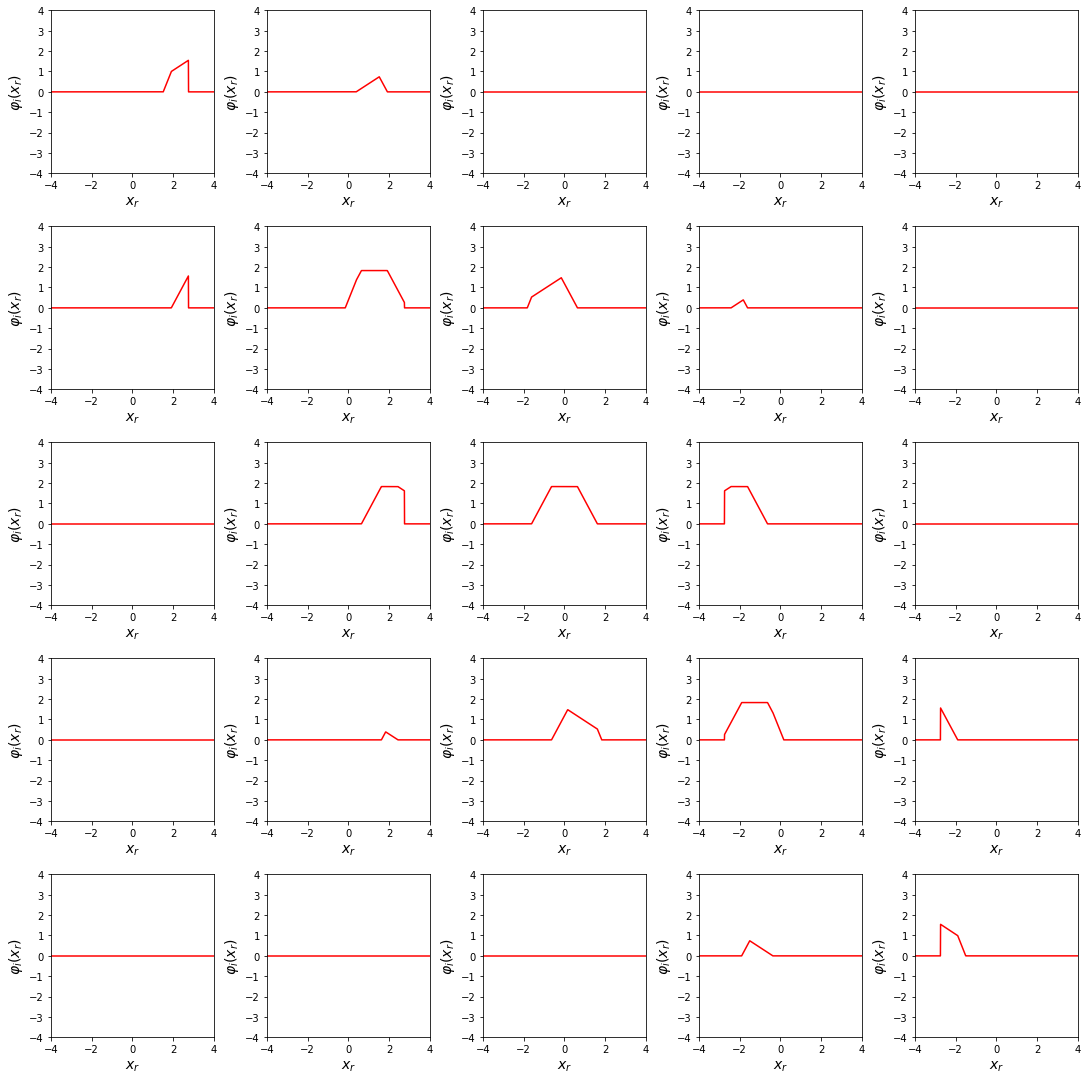

In [3]:
x = np.linspace(-4.0, 4.0, num=1000)
y = np.sum((phi_slopes[..., np.newaxis] * x + phi_heights[..., np.newaxis]) * (x > phi_intervals[0, ..., np.newaxis]) * (x < phi_intervals[1, ..., np.newaxis]), axis=0)

fig, axs = pyplot.subplots(n_a, n_b, constrained_layout=True, figsize=(15, 15))

for index in np.ndindex(n_a, n_b):
    axs[index].set_xlabel(r'$x_r$', fontsize=14)
    axs[index].set_ylabel(r'$\varphi_{i}(x_r)$', fontsize=14)
    axs[index].set_aspect('equal')
    axs[index].set_xlim(-4.0, 4.0)
    axs[index].set_ylim(-4.0, 4.0)

    axs[index].plot(x, y[index], color='red')

In [4]:
%%time
print('Removing null functions...')

antiderivatives = phi_slopes * np.power(phi_intervals, 2)/2 + phi_heights * phi_intervals
integrals = np.sum(antiderivatives[1] - antiderivatives[0], axis=0)

selection = np.nonzero(integrals)
n_selected = len(selection[0])

phi_slopes = phi_slopes[..., 0]
phi_heights = phi_heights[..., selection[0], selection[1]]
phi_intervals = phi_intervals[..., selection[0], selection[1]]

Removing null functions...
Wall time: 1.05 ms


In [5]:
%%time
print('Computing A and its inverse...')

in_intervals = phi_intervals[:, ..., np.newaxis, np.newaxis]
out_intervals = phi_intervals[:, np.newaxis, np.newaxis, ...]

in_slopes = phi_slopes[..., np.newaxis, np.newaxis]
out_slopes = phi_slopes[np.newaxis, np.newaxis, ...]

in_heights = phi_heights[..., np.newaxis, np.newaxis]
out_heights = phi_heights[np.newaxis, np.newaxis, ...]

combined_intervals = np.clip(in_intervals, out_intervals[0], out_intervals[1])

order_2 = in_slopes * out_slopes
order_1 = in_slopes * out_heights + in_heights * out_slopes
order_0 = in_heights * out_heights

antiderivatives = order_2 * np.power(combined_intervals, 3)/3 + order_1 * np.power(combined_intervals, 2)/2 + order_0 * combined_intervals
matrix_A = np.sum(antiderivatives[1] - antiderivatives[0], axis=(0, 2)).reshape(n_selected, n_selected)

inverse_A = np.linalg.inv(matrix_A)

Computing A and its inverse...
Wall time: 6.98 ms


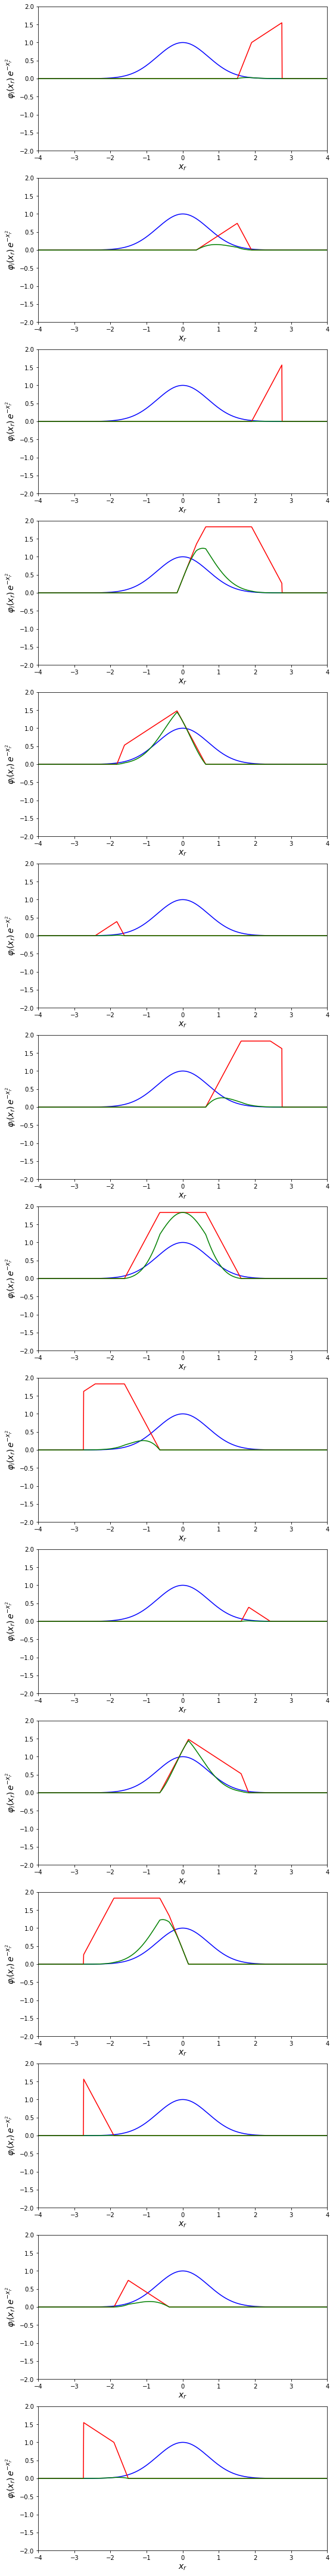

In [6]:
x = np.linspace(-4.0, 4.0, num=1000)
gaussian_y = np.exp(-np.square(x))
phi_y = np.sum((phi_slopes[..., np.newaxis] * x + phi_heights[..., np.newaxis]) * (x > phi_intervals[0, ..., np.newaxis]) * (x < phi_intervals[1, ..., np.newaxis]), axis=0)

fig, axs = pyplot.subplots(n_selected, constrained_layout=True, figsize=(8, 60))

for index in np.ndindex(n_selected):
    axs[index].set_xlabel(r'$x_r$', fontsize=14)
    axs[index].set_ylabel(r'$\varphi_{i}(x_r) \, e^{-x_r^2}$', fontsize=14)
    axs[index].set_aspect('equal')
    axs[index].set_xlim(-4.0, 4.0)
    axs[index].set_ylim(-2.0, 2.0)

    axs[index].plot(x, gaussian_y, color='blue')
    axs[index].plot(x, phi_y[index], color='red')
    axs[index].plot(x, gaussian_y * phi_y[index], color='green')

In [7]:
%%time
print('Computing vector v and vector c...')

antiderivatives = phi_slopes * np.power(phi_intervals, 2)/2 + phi_heights * phi_intervals

antiderivatives = (np.sqrt(np.pi) * phi_heights * special.erf(phi_intervals) - phi_slopes * np.exp(-np.square(phi_intervals))) / 2
vector_v = np.sum(antiderivatives[1] - antiderivatives[0], axis=0)

print('v =', vector_v)

vector_c = inverse_A @ vector_v

print('c =', vector_c)

Computing vector v and vector c...
v = [1.59656046e-02 1.38379700e-01 2.36172144e-03 1.25279445e+00
 1.39540162e+00 4.13048117e-03 2.26727245e-01 2.78985587e+00
 2.26727245e-01 4.13048117e-03 1.39540162e+00 1.25279445e+00
 2.36172144e-03 1.38379700e-01 1.59656046e-02]
c = [-0.44251971 -0.72207088  0.34046039  0.15221516  0.32154136  0.19507563
  0.07051907  0.05449042  0.07051907  0.19507563  0.32154136  0.15221516
  0.34046039 -0.72207088 -0.44251971]
Wall time: 998 µs


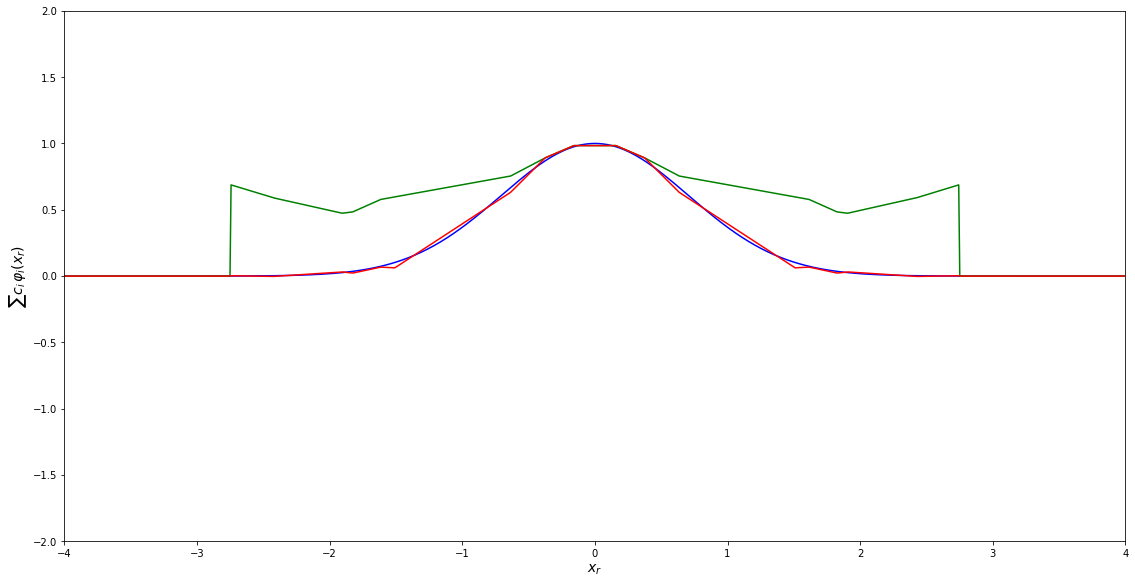

In [8]:
x = np.linspace(-4.0, 4.0, num=1000)
gaussian_y = np.exp(-np.square(x))
projection_y = np.sum((phi_slopes[..., np.newaxis] * x + phi_heights[..., np.newaxis]) * vector_c[..., np.newaxis] * (x > phi_intervals[0, ..., np.newaxis]) * (x < phi_intervals[1, ..., np.newaxis]), axis=(0, 1))
nonneg_y = np.sum((phi_slopes[..., np.newaxis] * x + phi_heights[..., np.newaxis]) * np.maximum(vector_c, 0.0)[..., np.newaxis] * (x > phi_intervals[0, ..., np.newaxis]) * (x < phi_intervals[1, ..., np.newaxis]), axis=(0, 1))

fig, ax = pyplot.subplots(constrained_layout=True, figsize=(16, 8))

ax.set_xlabel(r'$x_r$', fontsize=14)
ax.set_ylabel(r'$\sum c_i \, \varphi_{i}(x_r)$', fontsize=14)
ax.set_aspect('equal')
ax.set_xlim(-4.0, 4.0)
ax.set_ylim(-2.0, 2.0)

ax.plot(x, gaussian_y, color='blue')
ax.plot(x, nonneg_y, color='green')
ax.plot(x, projection_y, color='red')